In [427]:
#load necessary pakage and libraries
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [428]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [429]:
# change directory
os.chdir('../../edvancer/Data/')

In [430]:
pd.set_option('display.max_columns', 40)
inv_data = pd.read_csv('Existing Base.csv')
inv_data.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,1972,HTV,NP4 9HS,NP4,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,1998,Granada,M41 0QH,M41,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,1996,Tyne Tees,NE30 1JZ,NE30,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1997,Central,HR9 7RJ,HR9,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,1995,Scottish TV,KA10 7LS,KA10,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [431]:
inv_data.shape

(10155, 32)

In [432]:
inv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
REF_NO                             10155 non-null int64
children                           10155 non-null object
age_band                           10155 non-null object
status                             10155 non-null object
occupation                         10155 non-null object
occupation_partner                 10155 non-null object
home_status                        10155 non-null object
family_income                      10155 non-null object
self_employed                      10155 non-null object
self_employed_partner              10155 non-null object
year_last_moved                    10155 non-null int64
TVarea                             10155 non-null object
post_code                          10155 non-null object
post_area                          10155 non-null object
Average Credit Card Transaction    10155 non-null float64
Balance Transfer                   10

In [433]:
inv_data.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan  

In [434]:
inv_data.isnull().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
Average A/C Balance                0
Personal Loan                      0
Investment in Mutual Fund          0
Investment Tax Saving Bond         0
Home Loan                          0
Online Purchase Amount             0
Revenue Grid                       0
gender                             0
r

In [435]:
inv_data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

In [436]:
#clean the columns names
def clean_col(name):
    name = name.strip().lower().replace(" ", "_")
    return name.replace('/','_')
inv_data = inv_data.rename(columns = clean_col)

In [437]:
inv_data.head()

,ref_no,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,tvarea,post_code,post_area,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,revenue_grid,gender,region,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,1972,HTV,NP4 9HS,NP4,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,1998,Granada,M41 0QH,M41,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,1996,Tyne Tees,NE30 1JZ,NE30,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1997,Central,HR9 7RJ,HR9,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,1995,Scottish TV,KA10 7LS,KA10,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [438]:
#check pct of missing values in columns
inv_data.isnull().mean()*100

ref_no                             0.0
children                           0.0
age_band                           0.0
status                             0.0
occupation                         0.0
occupation_partner                 0.0
home_status                        0.0
family_income                      0.0
self_employed                      0.0
self_employed_partner              0.0
year_last_moved                    0.0
tvarea                             0.0
post_code                          0.0
post_area                          0.0
average_credit_card_transaction    0.0
balance_transfer                   0.0
term_deposit                       0.0
life_insurance                     0.0
medical_insurance                  0.0
average_a_c_balance                0.0
personal_loan                      0.0
investment_in_mutual_fund          0.0
investment_tax_saving_bond         0.0
home_loan                          0.0
online_purchase_amount             0.0
revenue_grid             

In [439]:
inv_data['children'].value_counts()

Zero    6208
1       1848
2       1607
3        473
4+        19
Name: children, dtype: int64

In [440]:
#we can replace the two off variable apropriately and transform to numerical type
inv_data.loc[(inv_data['children'] =='Zero'), 'children'] = '0'
inv_data.loc[(inv_data['children'] =='4+'), 'children'] = '4'
inv_data['children'] = pd.to_numeric(inv_data['children'], errors='coerce')

In [441]:
inv_data['revenue_grid'].value_counts()

2    9069
1    1086
Name: revenue_grid, dtype: int64

In [442]:
inv_data['y'] = np.where(inv_data['revenue_grid'] == 2,0,1)
inv_data = inv_data.drop('revenue_grid',1)

In [443]:
round(inv_data.groupby('age_band').agg({'y':'mean'}),2)

,y
age_band,
18-21,0.17
22-25,0.11
26-30,0.11
31-35,0.11
36-40,0.13
41-45,0.11
45-50,0.10
51-55,0.10
55-60,0.11


In [444]:
for i in range(len(inv_data)):
    if inv_data['age_band'][i] in ['71+', '65-70','45-50','51-55']:
        inv_data.loc[i,'age_band'] = 'ab_10'
    if inv_data['age_band'][i] in ['22-25','26-30','31-35','41-45','55-60']:
        inv_data.loc[i, 'age_band'] = 'ab_11'
    if inv_data['age_band'][i] == '36-40':
        inv_data.loc[i, 'age_band'] = 'ab_13'
    if inv_data['age_band'][i] == '18-21':
        inv_data.loc[i, 'age_band'] = 'ab_17'
    if inv_data['age_band'][i] == '61-65':
        inv_data.loc[i, 'age_band'] = 'ab_9'
ab_dummies = inv_data['age_band'].str.get_dummies()
ab_dummies.head()

,Unknown,ab_10,ab_11,ab_13,ab_17,ab_9
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [445]:
#add it back to the dataframe
inv_data = pd.concat([inv_data,ab_dummies],1)
inv_data = inv_data.drop(['Unknown', 'age_band'],1)

                     
                      

In [446]:

inv_data['status'].value_counts()

Partner                 7709
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: status, dtype: int64

In [447]:
#create dummies for status column
inv_data['st_partner'] = np.where(inv_data['status'] == 'Partner',1,0)
inv_data['st_SNM'] = np.where(inv_data['status'] == 'Single/Never Married',1,0)
inv_data['st_DS'] = np.where(inv_data['status'] == 'Divorced/Separated',1,0 )
inv_data = inv_data.drop(['status'], 1)

In [448]:
round(inv_data['occupation'].value_counts(normalize =True),2)

Professional         0.24
Retired              0.22
Secretarial/Admin    0.18
Housewife            0.12
Business Manager     0.07
Unknown              0.06
Manual Worker        0.05
Other                0.05
Student              0.01
Name: occupation, dtype: float64

In [449]:
#check relationship with the target variable
round(inv_data.groupby('occupation').agg({'y':'mean'}),2)

,y
occupation,
Business Manager,0.12
Housewife,0.09
Manual Worker,0.11
Other,0.11
Professional,0.12
Retired,0.10
Secretarial/Admin,0.11
Student,0.11
Unknown,0.11


In [450]:

#we can now go ahead and club those with similar avg together
for i in range(len(inv_data)):
    if inv_data['occupation'][i] in ['Manual Worker', 'Other','Secretarial/Admin','Student','Unknown']:
        inv_data.loc[i, 'occupation'] = 'occup_sec_adm'
    if inv_data['occupation'][i] in ['Professional','Business Manager']:
        inv_data.loc[i,'occupation'] = 'occup_prof'
    if inv_data['occupation'][i] == 'Retired':
        inv_data.loc[i, 'occupation'] = 'occup_retired'
occ_dummies = inv_data['occupation'].str.get_dummies()
occ_dummies.head()

,Housewife,occup_prof,occup_retired,occup_sec_adm
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [451]:
# add to dataframe
inv_data = pd.concat([inv_data, occ_dummies], 1)
inv_data = inv_data.drop(['Housewife', 'occupation'], 1)

In [452]:
round(inv_data['occupation_partner'].value_counts(normalize = True),2)

Unknown              0.24
Professional         0.20
Retired              0.19
Manual Worker        0.15
Business Manager     0.07
Secretarial/Admin    0.07
Housewife            0.05
Other                0.03
Student              0.00
Name: occupation_partner, dtype: float64

In [453]:
# check relationship with target
round(inv_data.groupby('occupation_partner').agg({'y':'mean'}),2)

,y
occupation_partner,
Business Manager,0.11
Housewife,0.11
Manual Worker,0.11
Other,0.10
Professional,0.11
Retired,0.10
Secretarial/Admin,0.12
Student,0.12
Unknown,0.10


In [454]:
the_11 = ['Business Manager', 'Housewife','Manual Worker','Professional']
the_10 = ['Other','Retired','Unknown']
the_12 = ['Secretarial/Admin','Student']
for i in range(len(inv_data)):
    if inv_data['occupation_partner'][i] in the_11:
        inv_data.loc[i,'occupation_partner'] = 'part_occ_pro'
    if inv_data['occupation_partner'][i] in the_10:
        inv_data.loc[i, 'occupation_partner'] = 'part_occ_unknown'
    if inv_data['occupation_partner'][i] in the_12:
        inv_data.loc[i,'occupation_partner'] = 'part_occ_sec'
part_occ_dummies = inv_data['occupation_partner'].str.get_dummies()
part_occ_dummies.head()

,part_occ_pro,part_occ_sec,part_occ_unknown
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1


In [455]:
#combine with data frame and drop one
inv_data = pd.concat([inv_data, part_occ_dummies],1)
inv_data = inv_data.drop(['occupation_partner','part_occ_sec'], 1)

In [456]:
round(inv_data['home_status'].value_counts(normalize = True),2)

Own Home                0.93
Rent from Council/HA    0.03
Rent Privately          0.03
Live in Parental Hom    0.01
Unclassified            0.00
Name: home_status, dtype: float64

In [457]:
round(inv_data.groupby('home_status').agg({'y':'mean'}),2)

,y
home_status,
Live in Parental Hom,0.11
Own Home,0.11
Rent Privately,0.11
Rent from Council/HA,0.12
Unclassified,0.08


In [458]:
the_11 =['Live in Parental Hom','Own Home','Rent Privately']
for i in range(len(inv_data)):
    if inv_data['home_status'][i] in the_11:
        inv_data.loc[i,'home_status'] = 'Hm_ownH'
    if inv_data['home_status'][i] == 'Rent from Council/HA':
        inv_data.loc[i,'home_status'] = 'Hm_council_R'
hm_st_dumm = inv_data['home_status'].str.get_dummies()
hm_st_dumm.head()

,Hm_council_R,Hm_ownH,Unclassified
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [459]:
# combine with dataframe and drop unclassified
inv_data = pd.concat([inv_data, hm_st_dumm],1)
inv_data = inv_data.drop(['home_status', 'Unclassified'],1)

In [460]:
pd.set_option('display.max_columns', 50)
inv_data.head()

,ref_no,children,family_income,self_employed,self_employed_partner,year_last_moved,tvarea,post_code,post_area,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,gender,region,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance,y,ab_10,ab_11,ab_13,ab_17,ab_9,st_partner,st_SNM,st_DS,occup_prof,occup_retired,occup_sec_adm,part_occ_pro,part_occ_unknown,Hm_council_R,Hm_ownH
0,1,0,"<17,500, >=15,000",No,No,1972,HTV,NP4 9HS,NP4,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,Female,Wales,74.67,18.66,32.32,89.43,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,2,0,"<27,500, >=25,000",No,No,1998,Granada,M41 0QH,M41,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Female,North West,20.19,0.00,4.33,22.78,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1
2,3,0,"<30,000, >=27,500",Yes,No,1996,Tyne Tees,NE30 1JZ,NE30,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,Male,North,98.06,31.07,80.96,171.78,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1
3,5,0,"<15,000, >=12,500",No,No,1997,Central,HR9 7RJ,HR9,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,Female,West Midlands,4.10,14.15,17.57,-41.70,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
4,6,0,"<30,000, >=27,500",No,No,1995,Scottish TV,KA10 7LS,KA10,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,Female,Scotland,70.16,55.86,80.44,235.02,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1


In [461]:
round(inv_data['tvarea'].value_counts(normalize = True),2)

Central          0.16
Carlton          0.15
Meridian         0.12
Yorkshire        0.10
Granada          0.10
HTV              0.08
Anglia           0.07
Tyne Tees        0.05
Scottish TV      0.05
TV South West    0.04
Grampian         0.02
Unknown          0.02
Ulster           0.02
Border           0.01
Name: tvarea, dtype: float64

In [462]:
round(inv_data.groupby('tvarea').agg({'y':'mean'}),2)

,y
tvarea,
Anglia,0.11
Border,0.14
Carlton,0.11
Central,0.11
Grampian,0.10
Granada,0.12
HTV,0.10
Meridian,0.09
Scottish TV,0.11


In [463]:
the_11 = ['Anglia','Carlton','Central', 'Scottish TV']
the_09 = ['Meridian','TV South West','Tyne Tees']
the_12 = ['Granada','Ulster','Unknown','Yorkshire']
for i in range(len(inv_data)):
    if inv_data['tvarea'][i] in the_11:
        inv_data.loc[i,'tvarea'] = 'tvarea_central'
    if inv_data['tvarea'][i] in the_09:
        inv_data.loc[i,'tvarea'] = 'tvarea_meridian'
    if inv_data['tvarea'][i] in the_12:
        inv_data.loc[i,'tvarea'] = 'tvarea_yorkshire'
    if inv_data['tvarea'][i] in ['Grampian','HTV']:
        inv_data.loc[i,'tvarea'] = 'tvarea_gramp'
tv_area_dumm = inv_data['tvarea'].str.get_dummies()
tv_area_dumm.head()

,Border,tvarea_central,tvarea_gramp,tvarea_meridian,tvarea_yorkshire
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,1,0,0,0
4,0,1,0,0,0


In [464]:
# add to data frame
inv_data = pd.concat([inv_data, tv_area_dumm],1)
inv_data = inv_data.drop(['Border', 'tvarea'], 1)
inv_data.head()

,ref_no,children,family_income,self_employed,self_employed_partner,year_last_moved,post_code,post_area,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,gender,region,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance,y,ab_10,ab_11,ab_13,ab_17,ab_9,st_partner,st_SNM,st_DS,occup_prof,occup_retired,occup_sec_adm,part_occ_pro,part_occ_unknown,Hm_council_R,Hm_ownH,tvarea_central,tvarea_gramp,tvarea_meridian,tvarea_yorkshire
0,1,0,"<17,500, >=15,000",No,No,1972,NP4 9HS,NP4,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,Female,Wales,74.67,18.66,32.32,89.43,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,2,0,"<27,500, >=25,000",No,No,1998,M41 0QH,M41,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Female,North West,20.19,0.00,4.33,22.78,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
2,3,0,"<30,000, >=27,500",Yes,No,1996,NE30 1JZ,NE30,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,Male,North,98.06,31.07,80.96,171.78,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
3,5,0,"<15,000, >=12,500",No,No,1997,HR9 7RJ,HR9,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,Female,West Midlands,4.10,14.15,17.57,-41.70,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0
4,6,0,"<30,000, >=27,500",No,No,1995,KA10 7LS,KA10,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,Female,Scotland,70.16,55.86,80.44,235.02,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0


In [465]:
#treat the gender column
inv_data['gender_f'] = np.where(inv_data['gender'] =='Female',1,0)
del inv_data['gender']

In [466]:
inv_data['self_employed'].value_counts()

No     9436
Yes     719
Name: self_employed, dtype: int64

In [467]:
inv_data['self_emp_yes'] = np.where(inv_data['self_employed'] == 'Yes',1,0)
del inv_data['self_employed']

In [468]:
inv_data['self_employed_partner'].value_counts()

No     9026
Yes    1129
Name: self_employed_partner, dtype: int64

In [469]:
inv_data['se_partner'] = np.where(inv_data['self_employed_partner'] == 'Yes',1,0)
del inv_data['self_employed_partner']

In [470]:
#drop columns with little frq
inv_data = inv_data.drop(['post_code','post_area','ref_no'],1)

In [471]:
inv_data.head()

,children,family_income,year_last_moved,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,region,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance,y,ab_10,ab_11,ab_13,ab_17,ab_9,st_partner,st_SNM,st_DS,occup_prof,occup_retired,occup_sec_adm,part_occ_pro,part_occ_unknown,Hm_council_R,Hm_ownH,tvarea_central,tvarea_gramp,tvarea_meridian,tvarea_yorkshire,gender_f,self_emp_yes,se_partner
0,0,"<17,500, >=15,000",1972,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,Wales,74.67,18.66,32.32,89.43,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1,0,"<27,500, >=25,000",1998,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,North West,20.19,0.00,4.33,22.78,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
2,0,"<30,000, >=27,500",1996,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,North,98.06,31.07,80.96,171.78,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
3,0,"<15,000, >=12,500",1997,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,West Midlands,4.10,14.15,17.57,-41.70,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0
4,0,"<30,000, >=27,500",1995,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,Scotland,70.16,55.86,80.44,235.02,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0


In [472]:
inv_data['region'].value_counts()

South East          2100
North West          1896
Unknown             1080
South West           971
West Midlands        820
Scotland             787
East Midlands        771
North                571
Wales                556
East Anglia          423
Northern Ireland     159
Isle of Man           16
Channel Islands        5
Name: region, dtype: int64

In [473]:
round(inv_data.groupby('region').agg({'y':'mean'}),2)

,y
region,
Channel Islands,0.20
East Anglia,0.13
East Midlands,0.10
Isle of Man,0.00
North,0.10
North West,0.11
Northern Ireland,0.12
Scotland,0.11
South East,0.10


In [474]:
x_11 = ['North West','Scotland','Wales','West Midlands']
x_12 = ['Northern Ireland','Unknown']
x_10 = ['North','South East']
for i in range(len(inv_data)):
    if inv_data['region'][i] in x_11:
        inv_data.loc[i, 'region'] = 'reg_NSWW'
    if inv_data['region'][i] in x_12:
        inv_data.loc[i,'region'] = 'reg_Niu'
    if inv_data['region'][i] in x_10:
        inv_data.loc[i, 'region'] = 'reg_NSe'
reg_dummies = inv_data['region'].str.get_dummies()
reg_dummies.head()

,Channel Islands,East Anglia,East Midlands,Isle of Man,South West,reg_NSWW,reg_NSe,reg_Niu
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [475]:
inv_data = pd.concat([inv_data,reg_dummies],1)
inv_data = inv_data.drop(['Channel Islands','Isle of Man','region'],1)

In [476]:
inv_data.head()

,children,family_income,year_last_moved,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance,y,ab_10,ab_11,ab_13,ab_17,ab_9,st_partner,st_SNM,st_DS,occup_prof,occup_retired,occup_sec_adm,part_occ_pro,part_occ_unknown,Hm_council_R,Hm_ownH,tvarea_central,tvarea_gramp,tvarea_meridian,tvarea_yorkshire,gender_f,self_emp_yes,se_partner,East Anglia,East Midlands,South West,reg_NSWW,reg_NSe,reg_Niu
0,0,"<17,500, >=15,000",1972,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,74.67,18.66,32.32,89.43,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,"<27,500, >=25,000",1998,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.19,0.00,4.33,22.78,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,0,"<30,000, >=27,500",1996,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,98.06,31.07,80.96,171.78,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,"<15,000, >=12,500",1997,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,4.10,14.15,17.57,-41.70,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0,"<30,000, >=27,500",1995,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,70.16,55.86,80.44,235.02,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0


In [477]:
inv_data['family_income'].value_counts()

>=35,000             2517
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64

In [478]:
round(inv_data.groupby('family_income').agg({'y':'mean'}),2)

,y
family_income,
"< 4,000",0.08
"< 8,000, >= 4,000",0.08
"<10,000, >= 8,000",0.11
"<12,500, >=10,000",0.10
"<15,000, >=12,500",0.11
"<17,500, >=15,000",0.12
"<20,000, >=17,500",0.11
"<22,500, >=20,000",0.12
"<25,000, >=22,500",0.10


In [479]:
f_08 = ['< 4,000','< 8,000, >= 4,000']
f_011 = ['<10,000, >= 8,000','<15,000, >=12,500','<20,000, >=17,500','>=35,000']
f_012 = ['<17,500, >=15,000','<22,500, >=20,000','<30,000, >=27,500']
f_10 = ['<12,500, >=10,000','<25,000, >=22,500','<27,500, >=25,000']
for i in range(len(inv_data)):
    if inv_data['family_income'][i] in f_08:
        inv_data.loc[i,'family_income'] = 'fi_08'
    if inv_data['family_income'][i] in f_011:
        inv_data.loc[i,'family_income'] = 'fi_011'
    if inv_data['family_income'][i] in f_012:
        inv_data.loc[i,'family_income'] = 'fi_012'
    if inv_data['family_income'][i] in f_10:
        inv_data.loc[i,'family_income'] = 'fi_10'
fi_dummies = inv_data['family_income'].str.get_dummies()
fi_dummies.head()

,Unknown,fi_011,fi_012,fi_08,fi_10
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [480]:
inv_data = pd.concat([inv_data, fi_dummies],1)
inv_data = inv_data.drop(['Unknown', 'family_income'],1)
inv_data.head()

,children,year_last_moved,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance,y,ab_10,ab_11,ab_13,ab_17,ab_9,st_partner,st_SNM,st_DS,occup_prof,occup_retired,occup_sec_adm,part_occ_pro,part_occ_unknown,Hm_council_R,Hm_ownH,tvarea_central,tvarea_gramp,tvarea_meridian,tvarea_yorkshire,gender_f,self_emp_yes,se_partner,East Anglia,East Midlands,South West,reg_NSWW,reg_NSe,reg_Niu,fi_011,fi_012,fi_08,fi_10
0,0,1972,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,74.67,18.66,32.32,89.43,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1998,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.19,0.00,4.33,22.78,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1996,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,98.06,31.07,80.96,171.78,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,0,1997,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,4.10,14.15,17.57,-41.70,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,1995,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,70.16,55.86,80.44,235.02,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [481]:
#treat year last moved column
inv_data['YLM_age'] = pd.to_numeric(2019 - inv_data['year_last_moved'])
inv_data = inv_data.drop(['year_last_moved'], 1)
inv_data.head()

,children,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance,y,ab_10,ab_11,ab_13,ab_17,ab_9,st_partner,st_SNM,st_DS,occup_prof,occup_retired,occup_sec_adm,part_occ_pro,part_occ_unknown,Hm_council_R,Hm_ownH,tvarea_central,tvarea_gramp,tvarea_meridian,tvarea_yorkshire,gender_f,self_emp_yes,se_partner,East Anglia,East Midlands,South West,reg_NSWW,reg_NSe,reg_Niu,fi_011,fi_012,fi_08,fi_10,YLM_age
0,0,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,74.67,18.66,32.32,89.43,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,47
1,0,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.19,0.00,4.33,22.78,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,21
2,0,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,98.06,31.07,80.96,171.78,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,23
3,0,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,4.10,14.15,17.57,-41.70,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,22
4,0,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,70.16,55.86,80.44,235.02,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,24


In [482]:
#any missing values after greting dummy
inv_data.isnull().any().any()

False

In [483]:
#sepaate output from input
y = inv_data['y']
X = inv_data.drop(['y'],1)

In [484]:
#check whether the target column has been removed successfully
'y' in X.columns

False

In [485]:
X.shape, y.shape

((10155, 49), (10155,))

we have observed that the variable are somewhat high which could predispose our model to some level of multicollinearity. we would reduce the dimension through applying the concept of PCA

In [486]:
# split the data into two training and test data set
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
X_train.columns

Index(['children', 'average_credit_card_transaction', 'balance_transfer',
       'term_deposit', 'life_insurance', 'medical_insurance',
       'average_a_c_balance', 'personal_loan', 'investment_in_mutual_fund',
       'investment_tax_saving_bond', 'home_loan', 'online_purchase_amount',
       'investment_in_commudity', 'investment_in_equity',
       'investment_in_derivative', 'portfolio_balance', 'ab_10', 'ab_11',
       'ab_13', 'ab_17', 'ab_9', 'st_partner', 'st_SNM', 'st_DS', 'occup_prof',
       'occup_retired', 'occup_sec_adm', 'part_occ_pro', 'part_occ_unknown',
       'Hm_council_R', 'Hm_ownH', 'tvarea_central', 'tvarea_gramp',
       'tvarea_meridian', 'tvarea_yorkshire', 'gender_f', 'self_emp_yes',
       'se_partner', 'East Anglia', 'East Midlands', 'South West', 'reg_NSWW',
       'reg_NSe', 'reg_Niu', 'fi_011', 'fi_012', 'fi_08', 'fi_10', 'YLM_age'],
      dtype='object')

In [487]:
# Display some data
print('Sample sizes: \nX: {}, y: {}, Total: {}\n'.format(X_train.shape[0], y_test.shape[0],
                                                        X_train.shape[0] + y_test.shape[0]))
print('Training X Data: \n{}'.format(X_train.head()))
print("\n" )
print('Training y Data: \n{}'.format(y_train.head()))
print('Number of columns:X{}\n'.format(X_train.shape[1]))      
      

Sample sizes: 
X: 7616, y: 2539, Total: 10155

Training X Data: 
       children  average_credit_card_transaction  balance_transfer  \
2228          0                             0.00               0.0   
1115          0                            38.98               0.0   
4836          0                             0.00               0.0   
2751          1                            24.99               0.0   
10059         0                            98.48               0.0   

       term_deposit  life_insurance  medical_insurance  average_a_c_balance  \
2228            0.0           66.45               7.99                 2.99   
1115            0.0            0.00              36.96                 0.00   
4836            0.0            0.00               0.00                 0.00   
2751            0.0            0.00               0.00                 0.00   
10059           0.0           24.99               0.00                15.97   

       personal_loan  investment_in_mut

In [488]:
# standardize the training data set in readiness for PCA Treatment
std = StandardScaler()
Xstd = pd.DataFrame(std.fit_transform(X_train), columns=X_train.columns)
#df_X_standard = pd.DataFrame(Xstd)
#df_X_standard.head()
Xstd.head()

,children,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance,ab_10,ab_11,ab_13,ab_17,ab_9,st_partner,st_SNM,st_DS,occup_prof,occup_retired,occup_sec_adm,part_occ_pro,part_occ_unknown,Hm_council_R,Hm_ownH,tvarea_central,tvarea_gramp,tvarea_meridian,tvarea_yorkshire,gender_f,self_emp_yes,se_partner,East Anglia,East Midlands,South West,reg_NSWW,reg_NSe,reg_Niu,fi_011,fi_012,fi_08,fi_10,YLM_age
0,-0.695357,-0.453484,-0.576202,-0.503038,0.016380,-0.335864,-0.637373,-0.293313,-0.010236,0.907859,0.464561,0.008135,-0.495807,-0.193780,-0.219308,-0.489817,-0.716179,1.099753,-0.35256,-0.078801,-0.307262,-1.747347,2.855494,-0.274042,-0.672758,1.873993,-0.726276,-0.944301,1.074456,-0.186501,0.202148,-0.877221,-0.343073,1.941376,-0.562793,0.573711,-0.277899,-0.356783,-0.210109,-0.290314,-0.320639,-0.81128,1.672307,-0.376375,1.151610,-0.537477,-0.270425,-0.600405,-0.159522
1,-0.695357,0.303947,-0.576202,-0.503038,-0.676011,0.573276,-0.704161,-0.293313,-0.647136,-0.476280,-0.444290,-0.203764,-0.488757,-0.657012,-0.633922,-0.807866,-0.716179,1.099753,-0.35256,-0.078801,-0.307262,0.572296,-0.350202,-0.274042,-0.672758,-0.533620,1.376887,1.058985,-0.930704,-0.186501,0.202148,-0.877221,-0.343073,1.941376,-0.562793,0.573711,-0.277899,-0.356783,-0.210109,-0.290314,-0.320639,-0.81128,1.672307,-0.376375,1.151610,-0.537477,-0.270425,-0.600405,-0.087932
2,-0.695357,-0.453484,-0.576202,-0.503038,-0.676011,-0.586607,-0.704161,-0.293313,-0.647136,-0.121128,-0.444290,0.162388,-0.845712,-0.457078,-0.770030,-0.794273,1.396299,-0.909295,-0.35256,-0.078801,-0.307262,0.572296,-0.350202,-0.274042,-0.672758,1.873993,-0.726276,-0.944301,1.074456,5.361903,-4.946875,-0.877221,-0.343073,-0.515099,1.776853,0.573711,-0.277899,-0.356783,-0.210109,-0.290314,-0.320639,-0.81128,-0.597976,2.656927,-0.868349,-0.537477,3.697888,-0.600405,-0.087932
3,0.400636,0.032103,-0.576202,-0.503038,-0.676011,-0.586607,-0.704161,-0.293313,-0.188854,-0.476280,-0.444290,0.024378,-0.728216,-0.395560,-0.665370,-0.538218,-0.716179,1.099753,-0.35256,-0.078801,-0.307262,0.572296,-0.350202,-0.274042,-0.672758,-0.533620,1.376887,1.058985,-0.930704,-0.186501,0.202148,-0.877221,2.914834,-0.515099,-0.562793,0.573711,-0.277899,-0.356783,-0.210109,-0.290314,-0.320639,1.23262,-0.597976,-0.376375,-0.868349,1.860545,-0.270425,-0.600405,-0.087932
4,-0.695357,1.460107,-0.576202,-0.503038,-0.415622,-0.586607,-0.347436,-0.293313,-0.025937,-0.476280,-0.444290,-0.203764,-0.265514,-0.370337,-0.449509,-0.136501,-0.716179,1.099753,-0.35256,-0.078801,-0.307262,0.572296,-0.350202,-0.274042,-0.672758,-0.533620,1.376887,1.058985,-0.930704,-0.186501,0.202148,-0.877221,-0.343073,1.941376,-0.562793,0.573711,3.598433,2.802822,-0.210109,-0.290314,3.118775,-0.81128,-0.597976,-0.376375,-0.868349,1.860545,-0.270425,-0.600405,-0.021849


In [489]:
# Find principal components
pca = PCA(n_components=49)
X_pca = pd.DataFrame(pca.fit_transform(Xstd),columns=Xstd.columns)
#df_principal_c = pd.DataFrame(principal_components)
#df_principal_c.head()
X_pca.head()

,children,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance,ab_10,ab_11,ab_13,ab_17,ab_9,st_partner,st_SNM,st_DS,occup_prof,occup_retired,occup_sec_adm,part_occ_pro,part_occ_unknown,Hm_council_R,Hm_ownH,tvarea_central,tvarea_gramp,tvarea_meridian,tvarea_yorkshire,gender_f,self_emp_yes,se_partner,East Anglia,East Midlands,South West,reg_NSWW,reg_NSe,reg_Niu,fi_011,fi_012,fi_08,fi_10,YLM_age
0,-1.043103,1.985060,1.687787,0.411172,-1.841067,2.754535,0.303479,-0.202536,0.075947,1.142203,-0.677393,1.367202,0.549258,1.102375,-0.051463,-0.236334,1.089559,-0.411490,-0.073190,-1.045390,0.792051,-0.246641,-1.255093,-0.450003,-0.303908,-0.667912,-0.349013,-0.693848,-0.086191,0.115552,-0.928334,1.680432,0.182298,-0.259920,0.217750,0.171788,-0.487407,-0.037878,-0.398325,0.102352,0.124757,0.045282,-0.015026,-0.007220,0.003920,0.001338,-0.000002,-0.000104,0.000002
1,-1.653894,-1.629606,0.841829,-0.353439,0.876918,2.231390,-0.324220,-0.696184,-0.994727,0.565250,-0.939174,1.938496,-0.059796,1.181226,-0.931274,0.608963,0.206403,0.340586,0.121952,0.071038,-0.373480,-0.405470,-0.055753,0.235202,-0.023459,-0.242185,0.175752,-0.794718,0.196206,0.034655,0.296671,-0.147297,0.883649,-0.425272,-0.342014,0.071303,0.024341,-0.152865,-0.003221,-0.069878,0.154900,-0.009956,-0.028612,-0.009465,-0.002483,-0.002466,-0.000005,-0.000033,-0.000026
2,-2.529709,4.519527,-1.526984,3.570314,4.380369,-0.910971,3.608299,-3.390885,-0.237252,0.250541,0.838435,-0.337375,-0.025018,-0.544109,0.915652,0.210910,-0.439220,-1.117548,-1.641472,0.483307,-0.241519,0.524742,-0.014276,-1.505557,-0.179453,0.054812,0.084541,0.049511,-0.036998,0.414224,-0.106682,-0.121907,0.653937,0.028446,-0.153352,-0.416979,-0.376229,-0.074103,-0.655909,0.012336,0.040856,-0.094529,-0.012773,0.003756,0.012509,0.000948,0.000069,0.000077,-0.000020
3,-1.633620,-1.799533,-0.740205,0.516114,1.474286,-0.576057,-0.582303,2.797658,-0.109195,1.161991,-0.338448,0.613164,1.735296,-0.982220,-0.882256,0.470132,0.173041,0.341435,-0.190616,0.207452,-0.645295,0.169698,0.013174,-0.019490,1.011405,-0.007147,0.418268,-1.248791,0.624668,0.034474,0.001418,0.106428,0.047100,-0.085280,0.256230,-0.434190,-0.286076,-0.220452,-0.013491,-0.103273,-0.091837,-0.013022,-0.021516,-0.007279,0.000811,0.003294,0.000146,-0.000051,0.000006
4,-0.850658,-1.910057,-0.071741,-0.312762,2.246472,2.404077,-1.485752,1.585139,-0.029708,0.206157,-2.521092,1.168181,-0.111068,-1.697079,2.213211,-1.671538,-0.631762,-0.877740,-0.902888,1.174222,0.675664,-1.716513,0.975042,0.995226,-0.252570,-0.253929,1.325489,0.696595,-1.685637,0.234662,-0.008140,-0.052186,0.795012,0.594315,0.469504,0.191310,-0.235789,-0.221516,0.014336,0.011884,-0.244548,-0.044543,-0.009053,-0.016208,-0.004500,-0.007714,-0.000093,0.000067,0.000054


In [490]:
#explained variance
pca.explained_variance_

array([  6.94062169e+00,   3.33585899e+00,   2.20897011e+00,
         2.13881219e+00,   1.97328896e+00,   1.86414674e+00,
         1.75407046e+00,   1.71854928e+00,   1.61929058e+00,
         1.47684072e+00,   1.40761106e+00,   1.36138124e+00,
         1.32217767e+00,   1.27014445e+00,   1.23070781e+00,
         1.16114311e+00,   1.14832446e+00,   1.07543478e+00,
         1.05028847e+00,   1.03978761e+00,   9.46881920e-01,
         9.13837401e-01,   8.99976505e-01,   8.52546954e-01,
         8.18403425e-01,   7.98150189e-01,   7.01762051e-01,
         6.70493075e-01,   6.57017426e-01,   6.39827138e-01,
         6.06218928e-01,   5.77869731e-01,   5.41593748e-01,
         4.71989000e-01,   4.48321594e-01,   4.05573293e-01,
         3.92599460e-01,   1.56821134e-01,   1.46971531e-01,
         1.11175025e-01,   6.51824889e-02,   4.56758005e-02,
         1.35689064e-02,   1.22041564e-02,   4.77657813e-03,
         3.11214917e-03,   4.55458846e-09,   3.56951214e-09,
         2.54582320e-09]

In [491]:
#explained variance proportion
pca.explained_variance_ratio_

array([  1.41645341e-01,   6.80787549e-02,   4.50810226e-02,
         4.36492284e-02,   4.02712033e-02,   3.80438110e-02,
         3.57973562e-02,   3.50724343e-02,   3.30467465e-02,
         3.01396065e-02,   2.87267564e-02,   2.77832906e-02,
         2.69832178e-02,   2.59213153e-02,   2.51164859e-02,
         2.36967982e-02,   2.34351932e-02,   2.19476485e-02,
         2.14344586e-02,   2.12201552e-02,   1.93241208e-02,
         1.86497429e-02,   1.83668674e-02,   1.73989174e-02,
         1.67021107e-02,   1.62887794e-02,   1.43216745e-02,
         1.36835321e-02,   1.34085189e-02,   1.30576967e-02,
         1.23718149e-02,   1.17932598e-02,   1.10529336e-02,
         9.63242857e-03,   9.14942029e-03,   8.27700597e-03,
         8.01223389e-03,   3.20043131e-03,   2.99941900e-03,
         2.26887806e-03,   1.33025488e-03,   9.32159194e-04,
         2.76916457e-04,   2.49064417e-04,   9.74811864e-05,
         6.35132484e-05,   9.29507848e-11,   7.28471866e-11,
         5.19555755e-11]

In [492]:
# 
data = {'Variance':pca.explained_variance_,'%Variance':pca.explained_variance_ratio_*100}
var_report = pd.DataFrame(data)
var_report['Cumsum'] = var_report['%Variance'].cumsum()
print('Number of observations: n = {}'.format(pca.n_samples_))
var_report

Number of observations: n = 7616


,%Variance,Variance,Cumsum
0,1.416453e+01,6.940622e+00,14.164534
1,6.807875e+00,3.335859e+00,20.972410
2,4.508102e+00,2.208970e+00,25.480512
3,4.364923e+00,2.138812e+00,29.845435
4,4.027120e+00,1.973289e+00,33.872555
5,3.804381e+00,1.864147e+00,37.676936
6,3.579736e+00,1.754070e+00,41.256672
7,3.507243e+00,1.718549e+00,44.763915
8,3.304675e+00,1.619291e+00,48.068590
9,3.013961e+00,1.476841e+00,51.082550


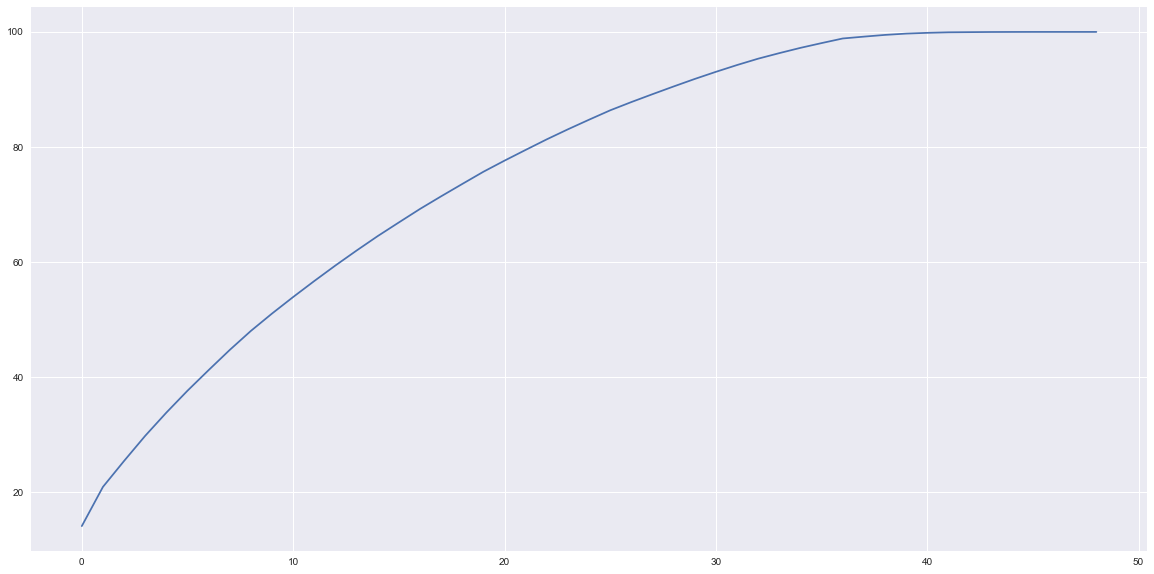

In [493]:
plt.plot(var_report['Cumsum'])

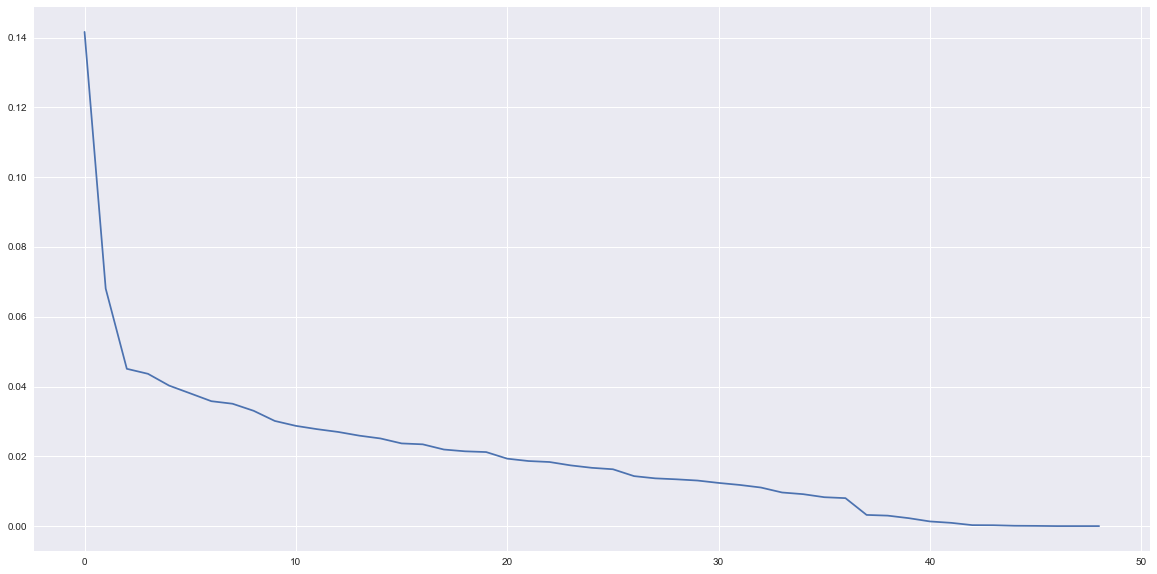

In [494]:
plt.plot(pca.explained_variance_ratio_)

In [495]:
#retain 37 component in line with the scree plot
X_pca =X_pca.iloc[:,:38]
X_pca.head()

,children,average_credit_card_transaction,balance_transfer,term_deposit,life_insurance,medical_insurance,average_a_c_balance,personal_loan,investment_in_mutual_fund,investment_tax_saving_bond,home_loan,online_purchase_amount,investment_in_commudity,investment_in_equity,investment_in_derivative,portfolio_balance,ab_10,ab_11,ab_13,ab_17,ab_9,st_partner,st_SNM,st_DS,occup_prof,occup_retired,occup_sec_adm,part_occ_pro,part_occ_unknown,Hm_council_R,Hm_ownH,tvarea_central,tvarea_gramp,tvarea_meridian,tvarea_yorkshire,gender_f,self_emp_yes,se_partner
0,-1.043103,1.985060,1.687787,0.411172,-1.841067,2.754535,0.303479,-0.202536,0.075947,1.142203,-0.677393,1.367202,0.549258,1.102375,-0.051463,-0.236334,1.089559,-0.411490,-0.073190,-1.045390,0.792051,-0.246641,-1.255093,-0.450003,-0.303908,-0.667912,-0.349013,-0.693848,-0.086191,0.115552,-0.928334,1.680432,0.182298,-0.259920,0.217750,0.171788,-0.487407,-0.037878
1,-1.653894,-1.629606,0.841829,-0.353439,0.876918,2.231390,-0.324220,-0.696184,-0.994727,0.565250,-0.939174,1.938496,-0.059796,1.181226,-0.931274,0.608963,0.206403,0.340586,0.121952,0.071038,-0.373480,-0.405470,-0.055753,0.235202,-0.023459,-0.242185,0.175752,-0.794718,0.196206,0.034655,0.296671,-0.147297,0.883649,-0.425272,-0.342014,0.071303,0.024341,-0.152865
2,-2.529709,4.519527,-1.526984,3.570314,4.380369,-0.910971,3.608299,-3.390885,-0.237252,0.250541,0.838435,-0.337375,-0.025018,-0.544109,0.915652,0.210910,-0.439220,-1.117548,-1.641472,0.483307,-0.241519,0.524742,-0.014276,-1.505557,-0.179453,0.054812,0.084541,0.049511,-0.036998,0.414224,-0.106682,-0.121907,0.653937,0.028446,-0.153352,-0.416979,-0.376229,-0.074103
3,-1.633620,-1.799533,-0.740205,0.516114,1.474286,-0.576057,-0.582303,2.797658,-0.109195,1.161991,-0.338448,0.613164,1.735296,-0.982220,-0.882256,0.470132,0.173041,0.341435,-0.190616,0.207452,-0.645295,0.169698,0.013174,-0.019490,1.011405,-0.007147,0.418268,-1.248791,0.624668,0.034474,0.001418,0.106428,0.047100,-0.085280,0.256230,-0.434190,-0.286076,-0.220452
4,-0.850658,-1.910057,-0.071741,-0.312762,2.246472,2.404077,-1.485752,1.585139,-0.029708,0.206157,-2.521092,1.168181,-0.111068,-1.697079,2.213211,-1.671538,-0.631762,-0.877740,-0.902888,1.174222,0.675664,-1.716513,0.975042,0.995226,-0.252570,-0.253929,1.325489,0.696595,-1.685637,0.234662,-0.008140,-0.052186,0.795012,0.594315,0.469504,0.191310,-0.235789,-0.221516


majority of the columns are normally distributed with the exception of the children column

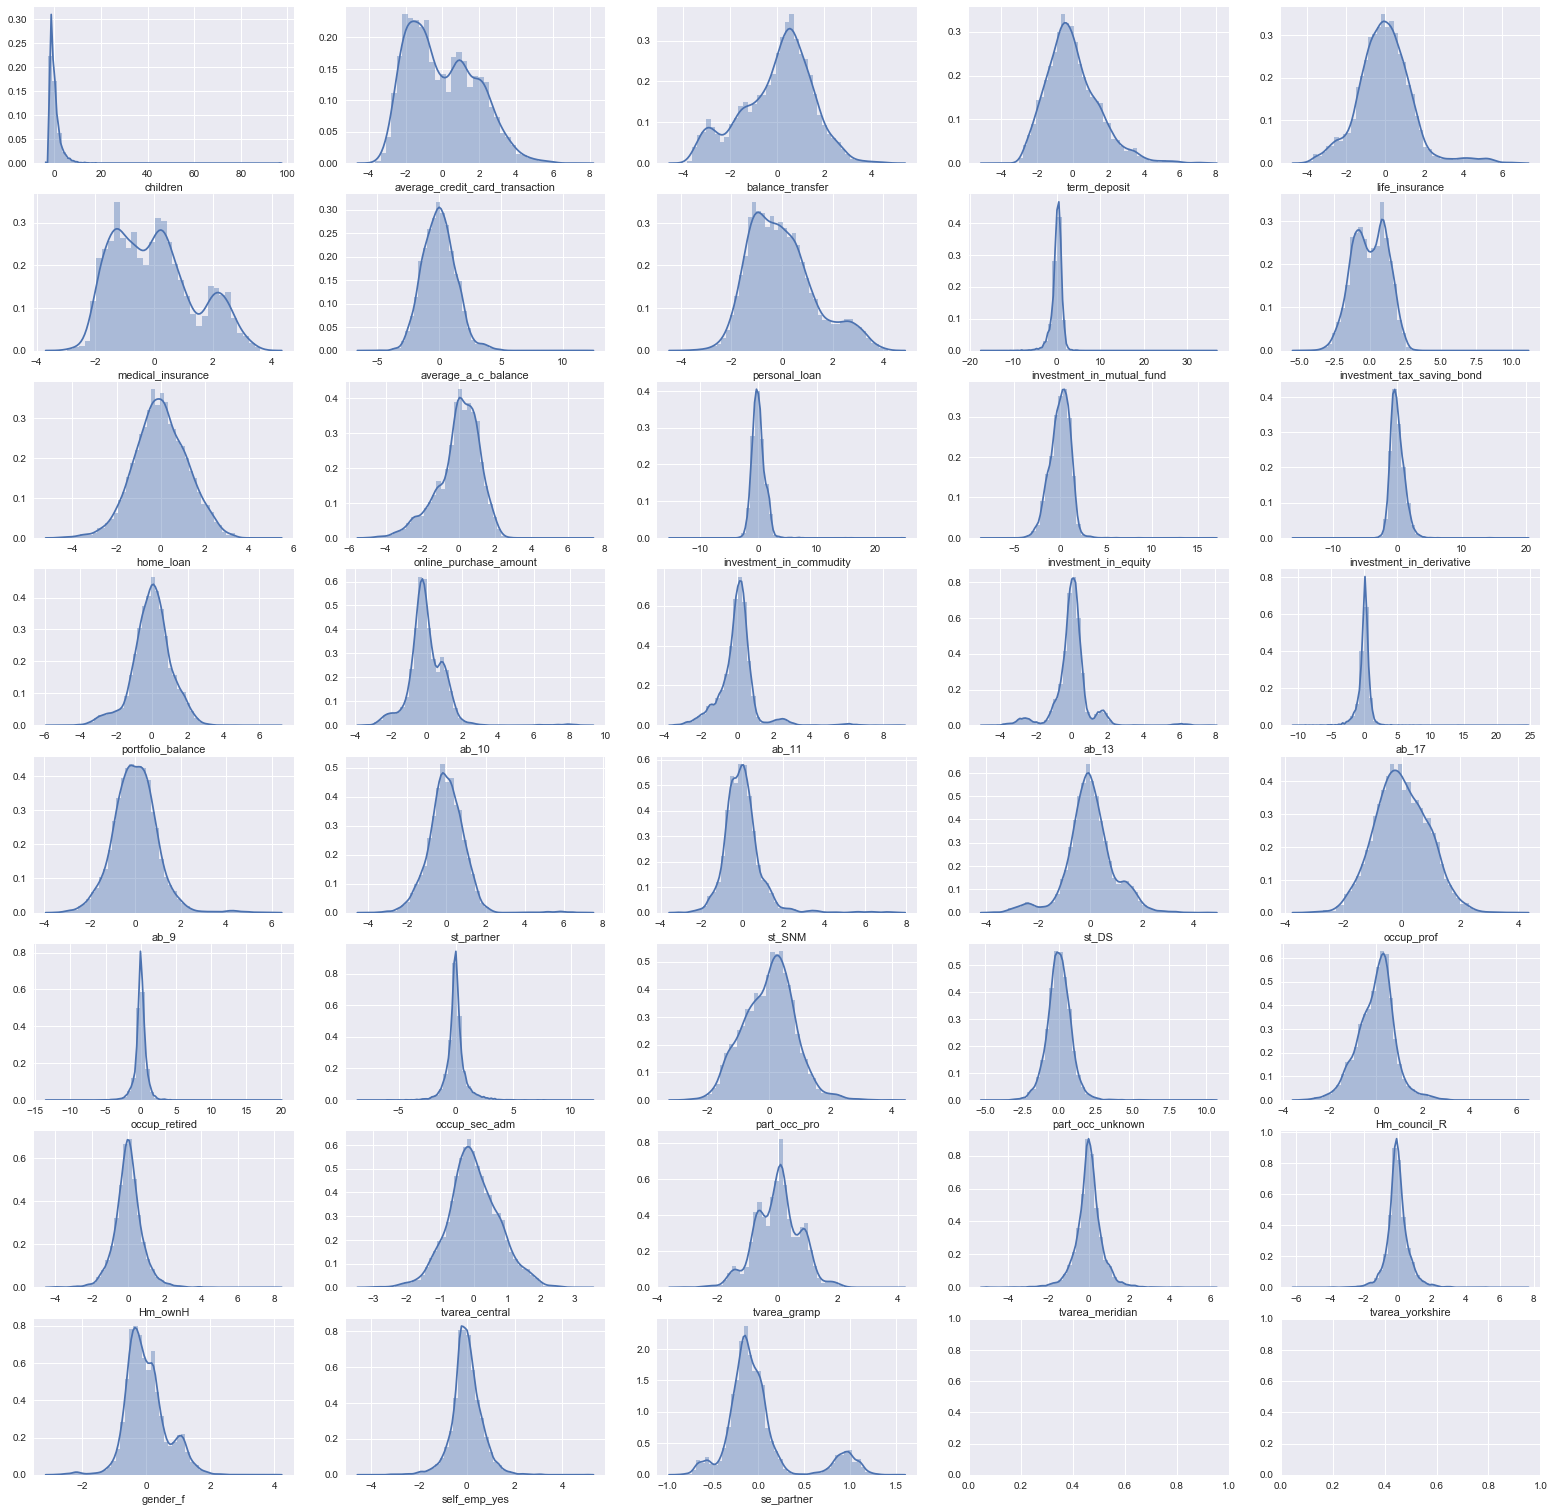

In [496]:
fig, axs = plt.subplots(8,5, figsize=(27,27))
for ix, col in enumerate(X_pca):
    p0 = ix//5
    p1 = ix % 5
    
    
    sns.distplot(X_pca[col], ax=axs[p0,p1])
    axs[p0,p1].set(xlabel=col)

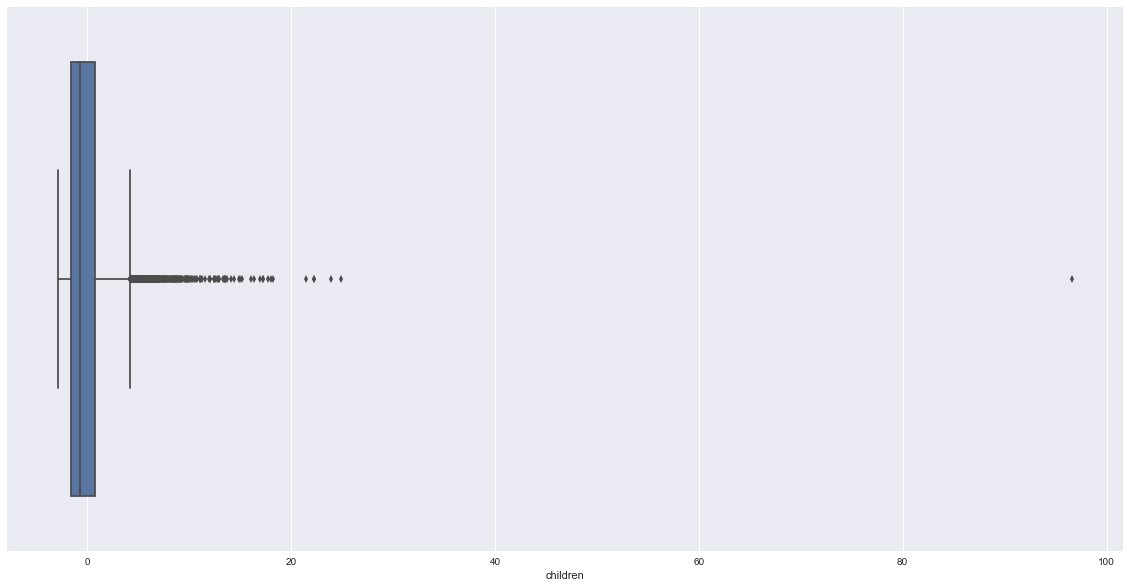

In [497]:
# what could be wrong with children column? - it is obvious that there is some outlier. we wont do anything in the main time

sns.boxplot(X_pca['children'])

In [498]:
X_pca.shape, y_train.shape

((7616, 38), (7616,))

In [499]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

In [500]:
predValidationFolds = np.zeros((X_pca.shape[0],))
predValidationFolds

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [501]:
for k, (trainidx, valididx) in enumerate(StratifiedKFold(n_splits=5, random_state=1005).split(X_pca, y_train)):
    trainX, trainY = X_pca.iloc[trainidx, :], y_train.iloc[trainidx]
    #print(trainX)
    valX, valY = X_pca.iloc[valididx, :], y_train.iloc[valididx]
    model = LogisticRegression(fit_intercept=True)
    model.fit(trainX, trainY)
    
    trainPredProba = model.predict_proba(trainX)[:, 1]
    print('train probas',trainPredProba)
    print('Train auc:', roc_auc_score(trainY,trainPredProba))
    validPredProba =  model.predict_proba(valX)[:,1]
    print('valid probas',validPredProba)
    print('Validation index:', valididx)
    predValidationFolds[valididx] = validPredProba
    print('Val acu:', roc_auc_score(valY, validPredProba))

train probas [ 0.00879957  0.03628076  0.01323214 ...,  0.00520714  0.00639759
  0.01329921]
Train auc: 0.95189271758
valid probas [ 0.08562656  0.01527303  0.16185022 ...,  0.98856785  0.40878861
  0.85264702]
Validation index: [   0    1    2 ..., 1603 1608 1625]
Val acu: 0.939091930893
train probas [ 0.06978996  0.01989089  0.16378631 ...,  0.00264651  0.00416638
  0.0120685 ]
Train auc: 0.950512149116
valid probas [ 0.00582622  0.09131611  0.01184305 ...,  0.99903498  0.99998049
  0.80860227]
Validation index: [1511 1513 1514 ..., 3231 3238 3241]
Val acu: 0.947027791374
train probas [ 0.11507309  0.01812536  0.1156636  ...,  0.00287465  0.00795521
  0.01263489]
Train auc: 0.950621298445
valid probas [  1.30560186e-02   3.48478631e-04   9.50307094e-03 ...,   1.71343229e-02
   8.97916709e-01   1.41287018e-01]
Validation index: [3030 3031 3032 ..., 4665 4672 4673]
Val acu: 0.94424502819
train probas [ 0.09840011  0.0161434   0.14253942 ...,  0.0028104   0.00611023
  0.01287496]
Train 

In [504]:
from sklearn.model_selection import cross_val_score

In [506]:
Xcv = X_pca.as_matrix()
ycv = y_train.values.ravel()
model = LogisticRegression()
scores = cross_val_score(model, Xcv, ycv, cv=5, scoring='roc_auc')
print('AUC score - Logistic Regression:', scores)


AUC score - Logistic Regression: [ 0.93909193  0.94702779  0.94424503  0.95015539  0.94710229]


In [514]:
x_test.shape


(2539, 49)

In [511]:
best_score = 0
best_feature = None
best_model = None

for feature in X_pca.columns:
    X = X_pca[[feature]].as_matrix()
    model = LogisticRegression()
    scores = cross_val_score(model, X, ycv, cv=5, scoring='roc_auc')
    
    score = scores.mean()
    if score > best_score:
        best_score = score
        best_model = model
        best_feature = feature
print('Mean AUC score - Logistic Regression:', best_score)

Mean AUC score - Logistic Regression: 0.743919374044


#### Out of The Box model

In [515]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [517]:
X_with_out_scale_pca = X_train.as_matrix()
X_with_scale_pca = X_pca.as_matrix()



In [519]:
X_variants = [X_with_out_scale_pca, X_with_scale_pca]
X_names = ['X without scale and pca', 'X with scale and pca']
for train_X, X_name in zip(X_variants, X_names):
    print('Data:', X_name)
    svc = SVC()
    svc_score = cross_val_score(svc, train_X, ycv, cv=5, scoring='roc_auc')
    print('Mean AUC score - SVC:', svc_score.mean())
    
    decision_tree = DecisionTreeClassifier()
    decision_tree_scores = cross_val_score(decision_tree, train_X, ycv, cv=5, scoring='roc_auc')
    print('Mean AUC score - Decision Tree:',decision_tree_scores.mean())
    
    randomforest = RandomForestClassifier()
    random_forest_score = cross_val_score(randomforest, train_X, ycv, cv=5, scoring='roc_auc')
    print('Mean AUC score - Random forest:', random_forest_score.mean())
    
    naive_bayes = GaussianNB()
    naive_bayes_score = cross_val_score(naive_bayes, train_X, ycv, cv=5, scoring='roc_auc')
    print('Mean AUC score - Naive Bayes:', naive_bayes_score.mean())
    
    knn = KNeighborsClassifier()
    knn_score = cross_val_score(knn, train_X, ycv, cv=5, scoring='roc_auc')
    print('Mean AUC score - KNN:', knn_score.mean())
    print('\n')

Data: X without scale and pca
Mean AUC score - SVC: 0.789900662902
Mean AUC score - Decision Tree: 0.855107267856
Mean AUC score - Random forest: 0.968448551332
Mean AUC score - Naive Bayes: 0.927032626122
Mean AUC score - KNN: 0.943354832516


Data: X with scale and pca
Mean AUC score - SVC: 0.962719081369
Mean AUC score - Decision Tree: 0.718431359253
Mean AUC score - Random forest: 0.877928989283
Mean AUC score - Naive Bayes: 0.850287424952
Mean AUC score - KNN: 0.715633099892




In [ ]:
# to predict on test data the data must be standardize and undergo the pca treatment like the traning data set
# test_std = StandardScaler()
# std_test = pd.DataFrame(test_std.fit_transform(x_test), columns= x_test.columns)
# test_pca = PCA(n_components=38)
# pca_test = pd.DataFrame(test_pca.fit_transform(std_test), columns= std_test.columns)
# #take out insignificant variable
# pca_test = pca_test.iloc[:,0:38]